In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt


In [3]:
df =pd.read_csv('C:\\Users\\91915\\Downloads\\social media prediction.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
df.shape

(14640, 15)

In [7]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
df.duplicated().sum()

36

In [11]:
#unique values of sentiment 
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [14]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [15]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [16]:
import seaborn as sns 

array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'airline_sentiment_confidence'}>],
       [<AxesSubplot:title={'center':'negativereason_confidence'}>,
        <AxesSubplot:title={'center':'retweet_count'}>]], dtype=object)

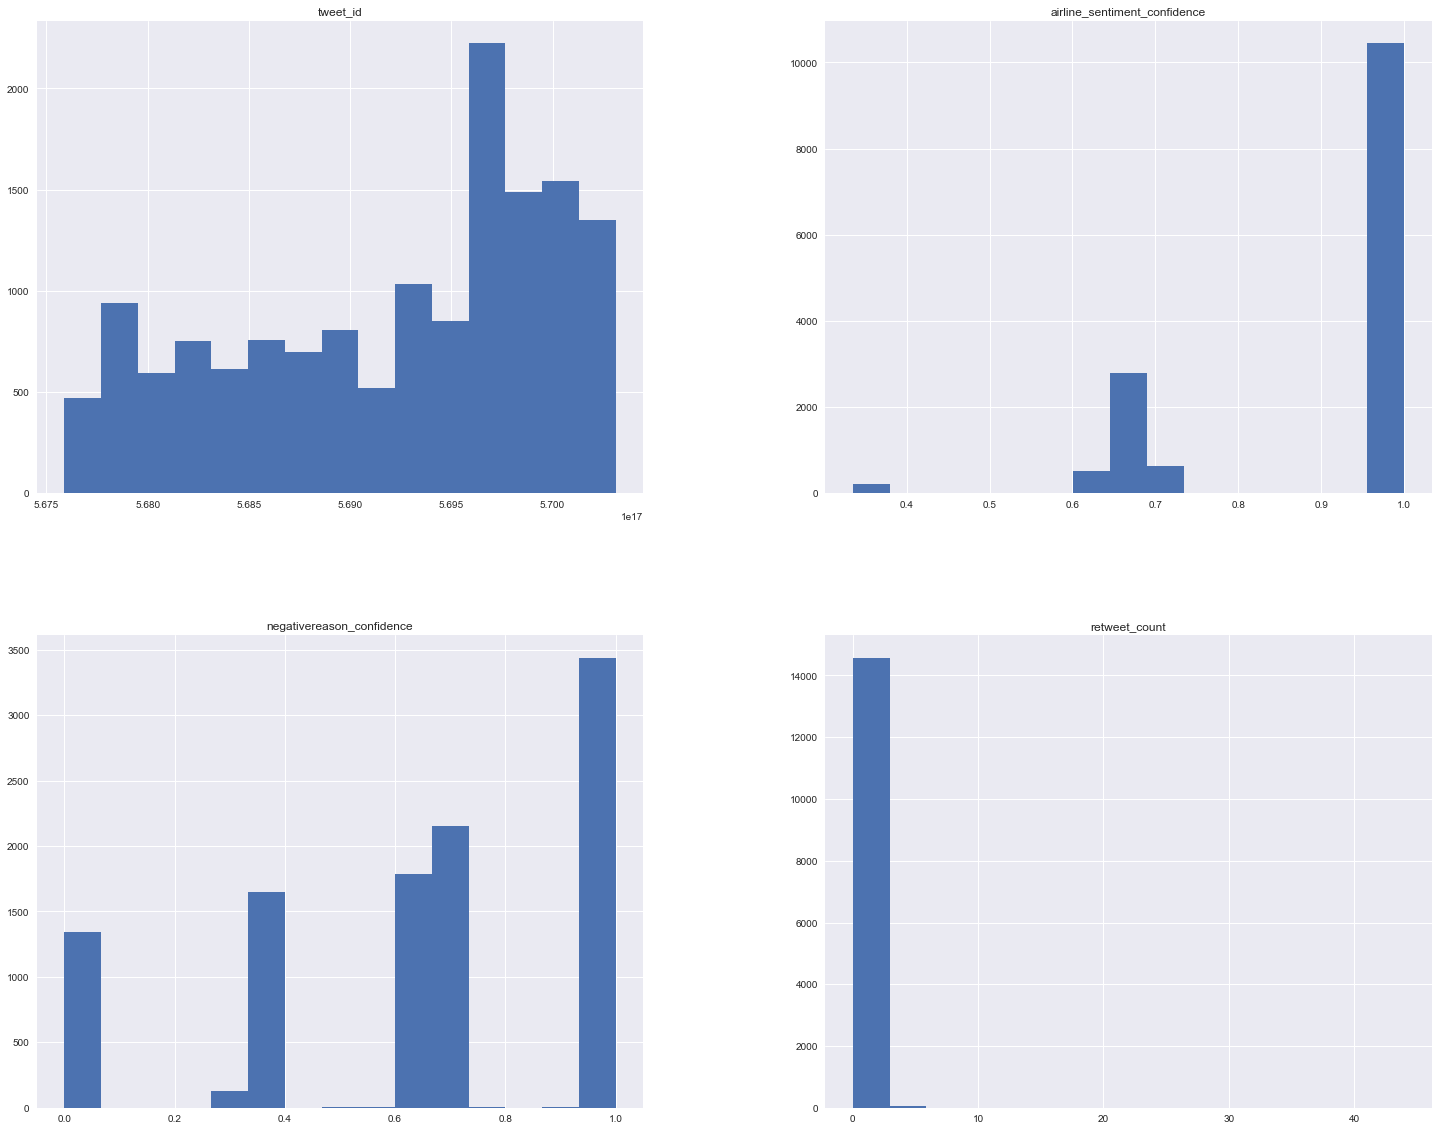

In [19]:
plt.style.use("seaborn")
df.hist(figsize=(25,20), bins=15)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

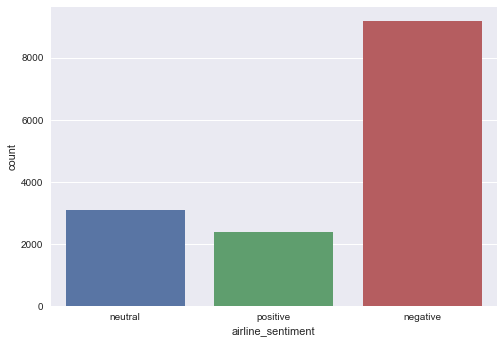

In [20]:
sns.countplot(x="airline_sentiment", data=df)


<AxesSubplot:xlabel='airline', ylabel='count'>

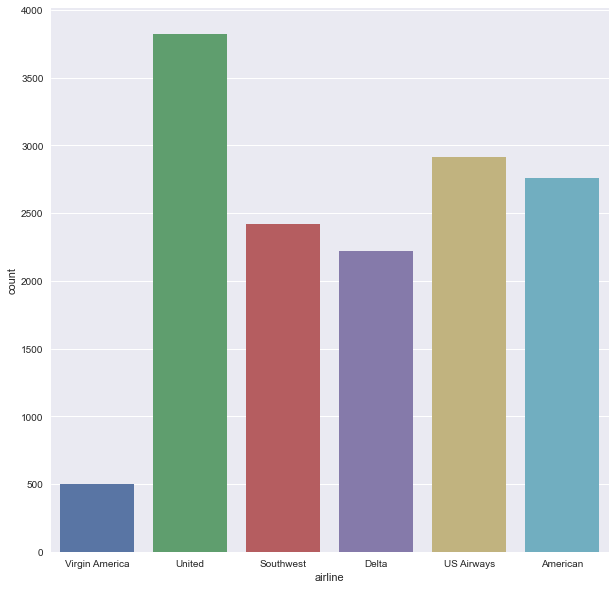

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x="airline", data=df)


<AxesSubplot:xlabel='retweet_count', ylabel='count'>

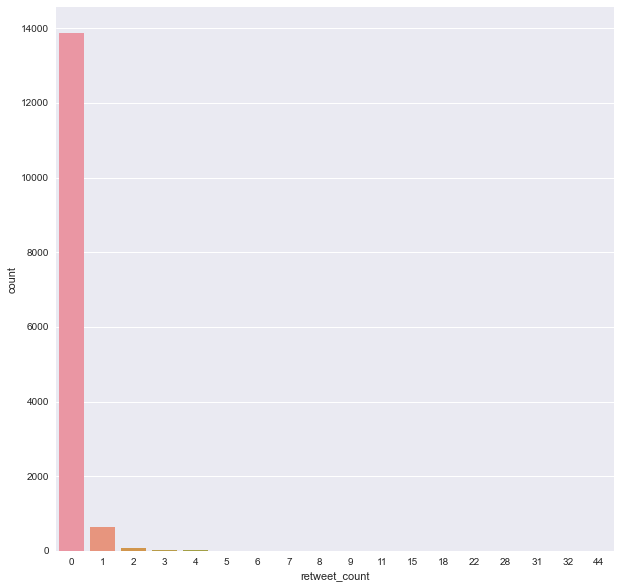

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(x="retweet_count", data=df)


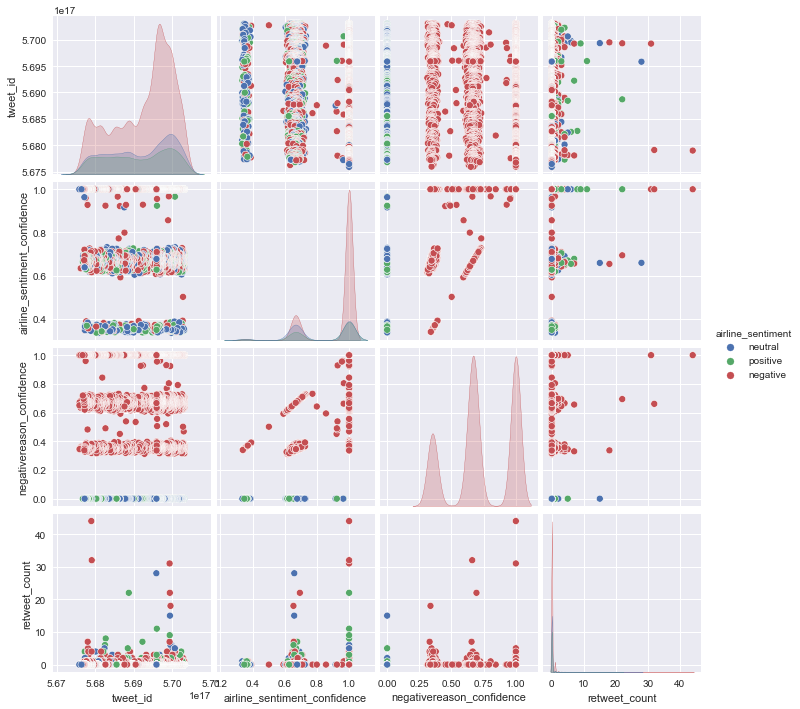

In [23]:
sns.pairplot(df,hue='airline_sentiment')


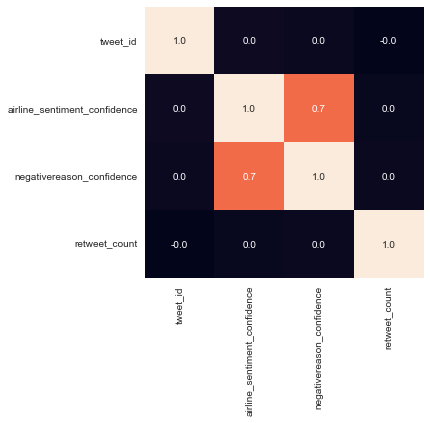

In [25]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cbar=False,fmt='.1f')
plt.show()


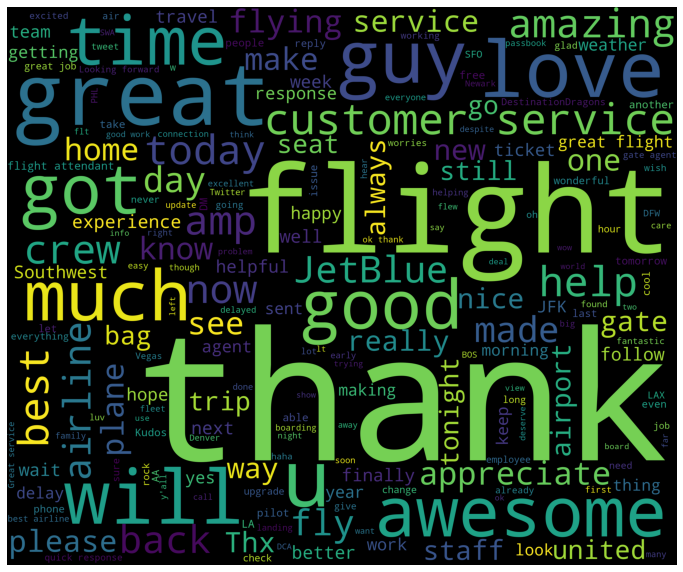

In [27]:
from wordcloud import WordCloud,STOPWORDS
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [30]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()


C:\Users\91915\AppData\Local\Temp/ipykernel_7328/1456243527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])


,airline_sentiment,text,airline_sentiment_encoded
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [70]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))


In [76]:
from nltk.corpus import stopwords                       


nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91915\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\91915\AppData\Local\Temp/ipykernel_7328/674027690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))


In [78]:
x = data.clean_tweet
y = data.airline_sentiment
print(len(x), len(y))

11541 11541


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))


8655 8655
2886 2886


In [90]:
from sklearn.linear_model import LinearRegression, LogisticRegression

model=LogisticRegression()

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


In [92]:
X=df.drop('airline_sentiment',axis=1)


In [94]:
X.head()

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,5.703010e+17,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
3,5.703010e+17,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada)


In [95]:
Y=df['airline_sentiment']

In [96]:
Y

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: airline_sentiment, Length: 11541, dtype: object

In [97]:
X

,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,5.703010e+17,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
3,5.703010e+17,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
5,5.703010e+17,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)
6,5.703010e+17,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2/24/2015 11:13,San Francisco CA,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14633,5.695880e+17,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2/22/2015 12:01,Los Angeles,Arizona
14634,5.695880e+17,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2/22/2015 12:01,NaN,Quito
14635,5.695880e+17,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/2015 12:01,NaN,NaN
14636,5.695870e+17,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/2015 11:59,Texas,NaN


In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.24,random_state=20)

In [99]:
X_train.head()


,tweet_id,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11736,5.677880e+17,0.6637,NaN,0.0000,US Airways,NaN,NaomiSheltonDC,NaN,0,@USAirways thanks. 😒,NaN,2/17/2015 12:50,NaN,Eastern Time (US & Canada)
14597,5.695930e+17,1.0000,Late Flight,1.0000,American,NaN,otisday,NaN,0,@AmericanAir @Stone9956 Do you dislike delays ...,NaN,2/22/2015 12:23,Pekin,Eastern Time (US & Canada)
13925,5.696900e+17,1.0000,Late Flight,0.6776,American,NaN,fpinell,NaN,0,@AmericanAir The delay is nothing but the pers...,NaN,2/22/2015 18:49,Santo Domingo,La Paz
13186,5.699190e+17,1.0000,Customer Service Issue,1.0000,American,NaN,jeffsberry,NaN,0,@AmericanAir @British_Airways trying to speak ...,NaN,2/23/2015 9:56,NaN,NaN
6582,5.677710e+17,0.6531,Can't Tell,0.6531,Southwest,NaN,TomVH,NaN,0,@SouthwestAir right but the point was that my ...,NaN,2/17/2015 11:40,Michigan,Eastern Time (US & Canada)


In [100]:
X_train.shape

(8771, 14)

In [101]:
X_test.head


<bound method NDFrame.head of            tweet_id  airline_sentiment_confidence          negativereason  \
11084  5.685230e+17                           1.0              Bad Flight   
2334   5.692560e+17                           1.0              Bad Flight   
13621  5.697950e+17                           1.0  Customer Service Issue   
1981   5.694940e+17                           1.0             Late Flight   
9952   5.696020e+17                           1.0             Late Flight   
...             ...                           ...                     ...   
12740  5.700410e+17                           1.0  Customer Service Issue   
12716  5.700480e+17                           1.0            Lost Luggage   
5431   5.690750e+17                           1.0  Customer Service Issue   
266    5.689290e+17                           1.0  Customer Service Issue   
3237   5.685750e+17                           1.0        Cancelled Flight   

       negativereason_confidence         airl

In [102]:
X_test.shape

(2770, 14)

In [103]:
Y_train.head()

11736    positive
14597    negative
13925    negative
13186    negative
6582     negative
Name: airline_sentiment, dtype: object

In [104]:
Y_train.shape

(8771,)

In [105]:
Y_test.head()

11084    negative
2334     negative
13621    negative
1981     negative
9952     negative
Name: airline_sentiment, dtype: object

In [106]:
Y_test.shape

(2770,)